In [13]:
import geopy.distance
import pandas as pd
import numpy as np
from scipy.spatial.distance import squareform

from ripser import ripser
from persim import plot_diagrams

In [2]:
hospital_data = pd.read_csv('MWI_HCF_1.csv', index_col=0)

In [3]:
hospital_data = hospital_data.dropna(subset = ['longitude','latitude'])

In [4]:
hospital_data

,SITE,District,HMIU_code,Facility type,Authority,Location rural/urban,Traditional authority,longitude,latitude,2020 Q1,2020 Q2,2020 Q3,2020 Q4,Code (number-distr-type-authority)
1.0,Adventist Health Centre Lilongwe,Lilongwe,1563.0,Other hospital,Private,Urban,Area 14,-13.95473,33.77930,295.0,296.0,281.0,285.0,1.1.1.2
2.0,African Bible College Clinic,Lilongwe,4040.0,Special / other site,Private,Urban,Area 47,-13.96816,33.74129,1242.0,1154.0,1268.0,1218.0,2.1.12.2
3.0,Ahi Private Clinic,Zomba,2753.0,Special / other site,Private,Urban,Chirunga Ward,-15.38361,35.32230,87.0,84.0,85.0,72.0,3.2.12.2
4.0,Airwing Clinic,Lilongwe,1557.0,Health centre,Public,Rural,TA Njewa,-13.96162,33.69679,379.0,423.0,399.0,455.0,4.1.4.1
5.0,Akasale Private Clinic,Chiradzulu,2817.0,Special / other site,Private,Rural,TA Likoswe,-15.75960,35.11493,43.0,41.0,43.0,41.0,5.3.12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757.0,Zingwangwa Health Centre,Blantyre,2922.0,Health centre,Public,Urban,TA Kapeni,-15.81803,34.99822,3448.0,3441.0,3524.0,3642.0,757.7.4.1
758.0,Zoa Health Centre,Thyolo,3123.0,Health centre,Public,Semi-urban,Senior TA Mbawela,-16.23769,35.19978,1368.0,1121.0,1219.0,1216.0,758.6.4.1
759.0,Zomba Central Hospital,Zomba,2722.0,Central hospital,Public,Urban,TA Chikowi,-15.39914,35.31286,7192.0,7218.0,7213.0,7274.0,759.2.8.1
760.0,Zomba Central Prison Clinic,Zomba,2762.0,Health centre,Public,Urban,TA Mlumbe,-15.39506,35.32417,706.0,688.0,742.0,747.0,760.2.4.1


In [5]:
lat_lon = np.array(hospital_data[['latitude', 'longitude']])

In [6]:
lat_lon

array([[ 33.7793 , -13.95473],
       [ 33.74129, -13.96816],
       [ 35.3223 , -15.38361],
       ...,
       [ 35.31286, -15.39914],
       [ 35.32417, -15.39506],
       [ 35.30467, -15.39889]])

In [7]:
distance_vector = []

for i in range(len(lat_lon)):
    for j in range(i+1, len(lat_lon)):
        distance_vector.append(geopy.distance.geodesic(lat_lon[i], lat_lon[j]).km)

In [8]:
distance_matrix = squareform(distance_vector)

In [9]:
distance_matrix.shape

(761, 761)

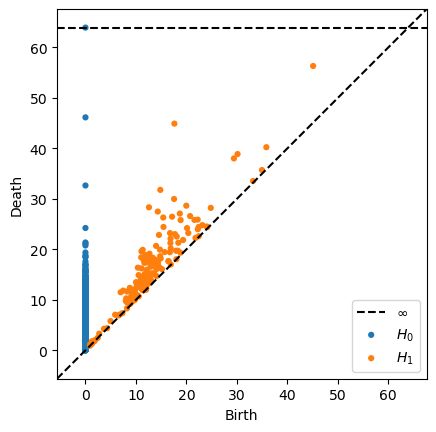

In [10]:
diagrams = ripser(distance_matrix, distance_matrix=True)['dgms']
plot_diagrams(diagrams, show=True)

# New data

In [14]:
distance_df = pd.read_csv('HCF_OD_full_WBD3hFR.csv', index_col=0)

In [15]:
# make df into numpy array
distance_matrix = np.asarray(distance_df)

In [16]:
# make diagonals 0
np.fill_diagonal(distance_matrix,0)

In [17]:
# make missing values equal to 1000
distance_matrix = np.nan_to_num(distance_matrix, nan=200)

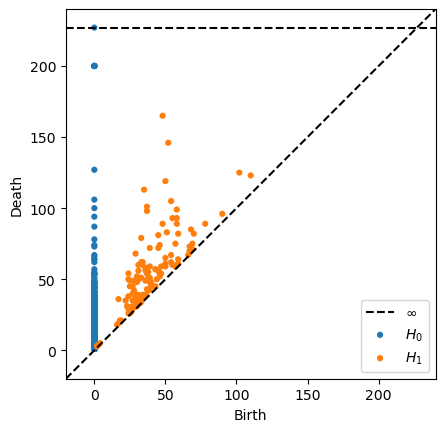

In [18]:
diagrams = ripser(distance_matrix, distance_matrix=True)['dgms']
plot_diagrams(diagrams, show=True)

# Dionysus

In [19]:
condensed_dm = squareform(distance_matrix)

ValueError: Distance matrix 'X' must be symmetric.

In [20]:
distance_matrix

array([[  0., 200., 200., ..., 200., 200.,  79.],
       [200.,   0.,  26., ..., 200.,  78., 200.],
       [200.,  26.,   0., ..., 200.,  82., 200.],
       ...,
       [200., 200., 200., ...,   0., 171., 200.],
       [200.,  78.,  82., ..., 171.,   0., 200.],
       [ 79., 200., 200., ..., 200., 200.,   0.]])

In [21]:
mask = ~np.isclose(distance_matrix, distance_matrix.T)
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [35]:
np.where(mask)

(array([  0,   0,   0, ..., 760, 760, 760]),
 array([ 22, 178, 187, ..., 598, 666, 699]))

In [38]:
mask0 = np.where(mask)[0]

In [39]:
mask1 = np.where(mask)[1]

In [87]:
discrepencies = []

for i in range(len(mask0)):
    if abs(distance_matrix[mask0[i],mask1[i]]-distance_matrix[mask1[i],mask0[i]]) > 25:
        print(i)
        discrepencies.append(i)

3
299
470
553
988
1067
1103
1314
1362
1563
1655
1720
1964
2039
2064
2087
2364
2575
2772
2802
2868
2967
2996
3056
3112
3140
3200
3295
3856
3897
3990
4031
4099
4130
4325
4847
4949
5134
5227
5253
5264
5325
5366
5471
5984
6001
6112
6156
6460
6474
6475
6477
6480
6481
6482
6483
6484
6485
6486
6487
6488
6489
6490
6491
6492
6493
6494
6495
6496
6497
6498
6499
6500
6501
6502
6503
6504
6505
6506
6507
6508
6509
6510
6511
6512
6513
6514
6515
6516
6517
6518
6519
6520
6521
6522
6523
6524
6525
6526
6527
6528
6529
6530
6531
6532
6533
6534
6535
6536
6537
6538
6539
6540
6541
6542
6543
6544
6545
6546
6547
6548
6549
6550
6551
6552
6553
6555
6556
6557
6558
6559
6560
6561
6562
6563
6564
6565
6566
6567
6568
6569
6570
6571
6572
6573
6574
6575
6576
6577
6578
6580
6581
6582
6583
6584
6585
6586
6587
6588
6589
6590
6591
6592
6593
6595
6596
6597
6598
6599
6600
6601
6602
6603
6604
6605
6606
6607
6608
6609
6610
6611
6612
6613
6614
6971
7011
7121
7198
7311
7583
7599
7640
7710
7741
7830
7923
7976
8515
8689
8730
8761
87

In [88]:
discrepancies = [[mask0[i],mask1[i]] for i in discrepencies]

In [89]:
discrepancies

[[0, 191],
 [6, 442],
 [9, 191],
 [12, 191],
 [23, 191],
 [25, 191],
 [26, 191],
 [32, 191],
 [34, 191],
 [41, 191],
 [45, 191],
 [47, 191],
 [54, 191],
 [56, 191],
 [58, 191],
 [59, 191],
 [65, 191],
 [71, 191],
 [74, 191],
 [75, 191],
 [77, 191],
 [82, 191],
 [83, 191],
 [85, 431],
 [89, 191],
 [90, 191],
 [92, 191],
 [95, 191],
 [109, 191],
 [111, 191],
 [115, 191],
 [117, 191],
 [119, 191],
 [120, 628],
 [126, 442],
 [135, 191],
 [137, 191],
 [142, 191],
 [149, 191],
 [150, 191],
 [150, 497],
 [154, 191],
 [156, 191],
 [160, 191],
 [176, 191],
 [177, 191],
 [182, 191],
 [184, 191],
 [190, 191],
 [191, 0],
 [191, 9],
 [191, 12],
 [191, 23],
 [191, 25],
 [191, 26],
 [191, 32],
 [191, 34],
 [191, 41],
 [191, 45],
 [191, 47],
 [191, 54],
 [191, 56],
 [191, 58],
 [191, 59],
 [191, 65],
 [191, 71],
 [191, 74],
 [191, 75],
 [191, 77],
 [191, 82],
 [191, 83],
 [191, 89],
 [191, 90],
 [191, 92],
 [191, 95],
 [191, 109],
 [191, 111],
 [191, 115],
 [191, 117],
 [191, 119],
 [191, 135],
 [191,

In [80]:
discrepencies

[3,
 553,
 988,
 1067,
 1103,
 1314,
 1362,
 1563,
 1655,
 1720,
 2039,
 2087,
 2364,
 2575,
 2772,
 2802,
 2868,
 2967,
 2996,
 3112,
 3140,
 3200,
 3856,
 3897,
 3990,
 4031,
 4099,
 4847,
 4949,
 5134,
 5227,
 5253,
 5325,
 5366,
 5471,
 5984,
 6001,
 6112,
 6156,
 6474,
 6477,
 6480,
 6481,
 6482,
 6483,
 6484,
 6485,
 6486,
 6487,
 6489,
 6491,
 6492,
 6493,
 6494,
 6495,
 6496,
 6497,
 6498,
 6499,
 6500,
 6501,
 6503,
 6504,
 6505,
 6506,
 6507,
 6508,
 6509,
 6510,
 6511,
 6512,
 6513,
 6514,
 6515,
 6516,
 6517,
 6518,
 6519,
 6521,
 6522,
 6523,
 6524,
 6525,
 6526,
 6527,
 6529,
 6531,
 6532,
 6533,
 6534,
 6535,
 6536,
 6537,
 6539,
 6540,
 6541,
 6542,
 6544,
 6545,
 6546,
 6547,
 6548,
 6549,
 6550,
 6551,
 6553,
 6555,
 6556,
 6557,
 6558,
 6560,
 6561,
 6562,
 6563,
 6564,
 6565,
 6566,
 6568,
 6569,
 6570,
 6571,
 6573,
 6574,
 6575,
 6576,
 6581,
 6582,
 6583,
 6584,
 6585,
 6586,
 6587,
 6588,
 6589,
 6590,
 6592,
 6593,
 6595,
 6596,
 6597,
 6598,
 6599,
 6600,
 660

In [84]:
mask0[6547]

191

In [85]:
mask1[6547]

340

In [71]:
distance_matrix[71,497]

110.0

In [72]:
distance_matrix[497,17]

200.0

In [34]:
29474/(768**2)

0.04997083875868055

In [86]:
distance_df.index[191]

'271.28.4.1'